In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from  sklearn import preprocessing as pre
import sklearn.model_selection as skmod
import sklearn.pipeline as pipe
import sklearn.neural_network as sk_nn
import sklearn.metrics as skmet
df1=pd.read_csv('Almond.csv',index_col=0)

In [2]:
cols=df1.columns
df1.head()

,Length (major axis),Width (minor axis),Thickness (depth),Area,Perimeter,Roundness,Solidity,Compactness,Aspect Ratio,Eccentricity,Extent,Convex hull(convex area),Type
0,NaN,227.940628,127.759132,22619.0,643.813269,NaN,0.973384,1.458265,NaN,NaN,0.681193,23237.5,MAMRA
1,NaN,234.188126,128.199509,23038.0,680.984841,NaN,0.957304,1.601844,NaN,NaN,0.656353,24065.5,MAMRA
2,NaN,229.418610,125.796547,22386.5,646.943212,NaN,0.967270,1.487772,NaN,NaN,0.683620,23144.0,MAMRA
3,NaN,232.763153,125.918808,22578.5,661.227483,NaN,0.965512,1.540979,NaN,NaN,0.685360,23385.0,MAMRA
4,NaN,230.150742,107.253448,19068.0,624.842706,NaN,0.951450,1.629395,NaN,NaN,0.714800,20041.0,MAMRA


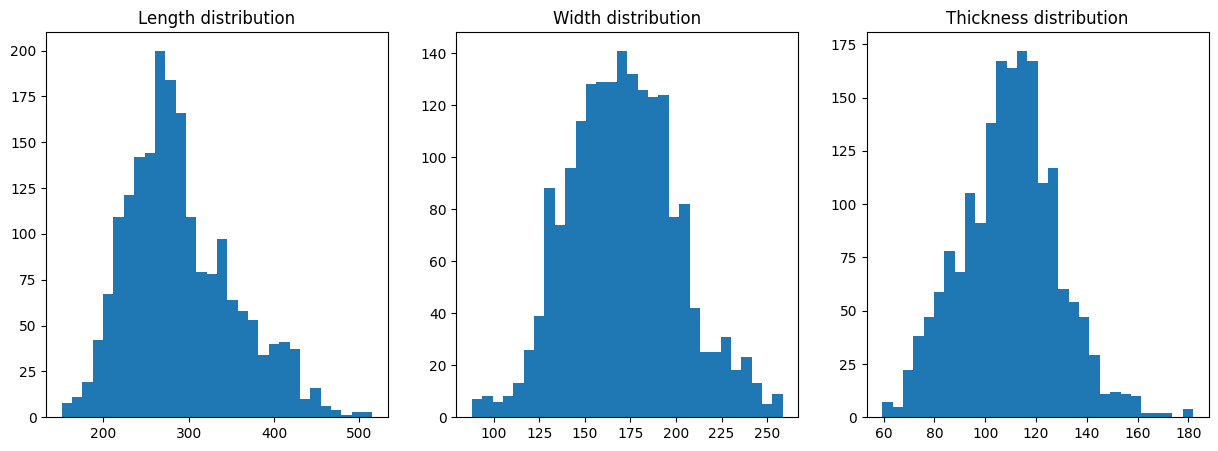

In [3]:
fig,ax=plt.subplots(1,3,figsize=(15,5))
ax[0].set_title('Length distribution')
hist=ax[0].hist(df1['Length (major axis)'],bins=30)

ax[1].set_title('Width distribution')
hist=ax[1].hist(df1['Width (minor axis)'],bins=30)

ax[2].set_title('Thickness distribution')
hist=ax[2].hist(df1['Thickness (depth)'],bins=30)

['MAMRA' 'SANORA' 'REGULAR']


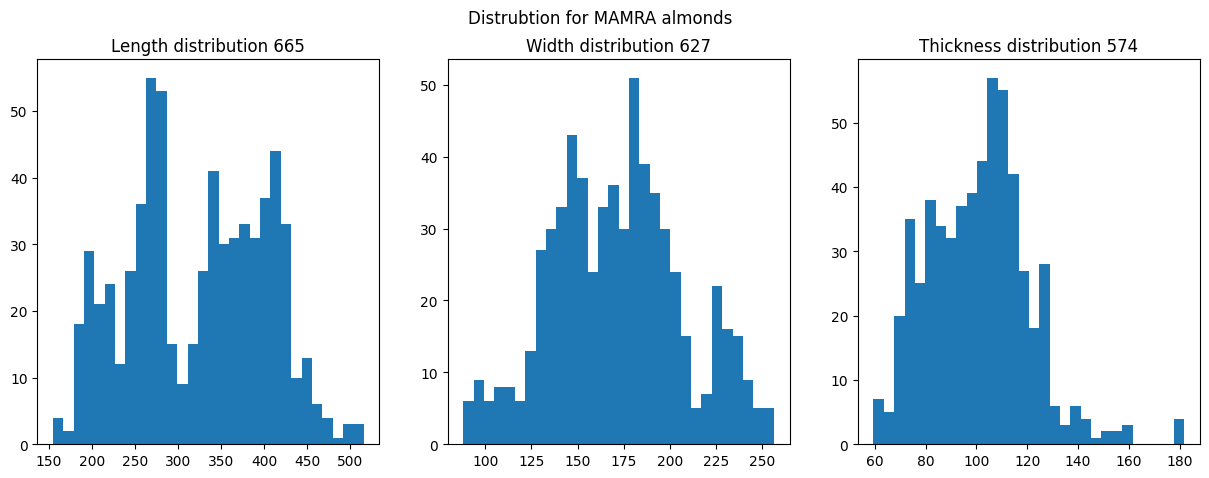

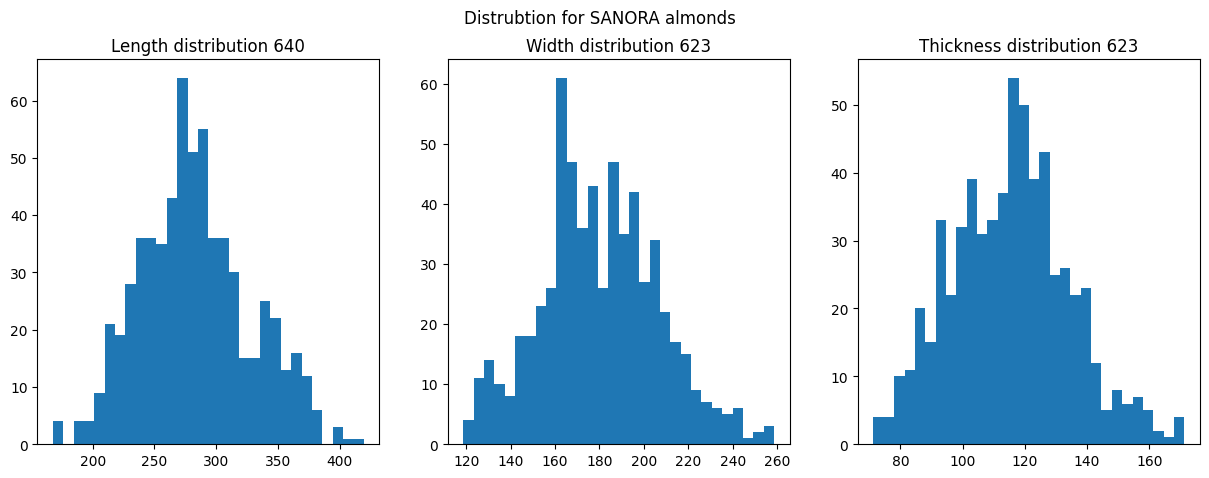

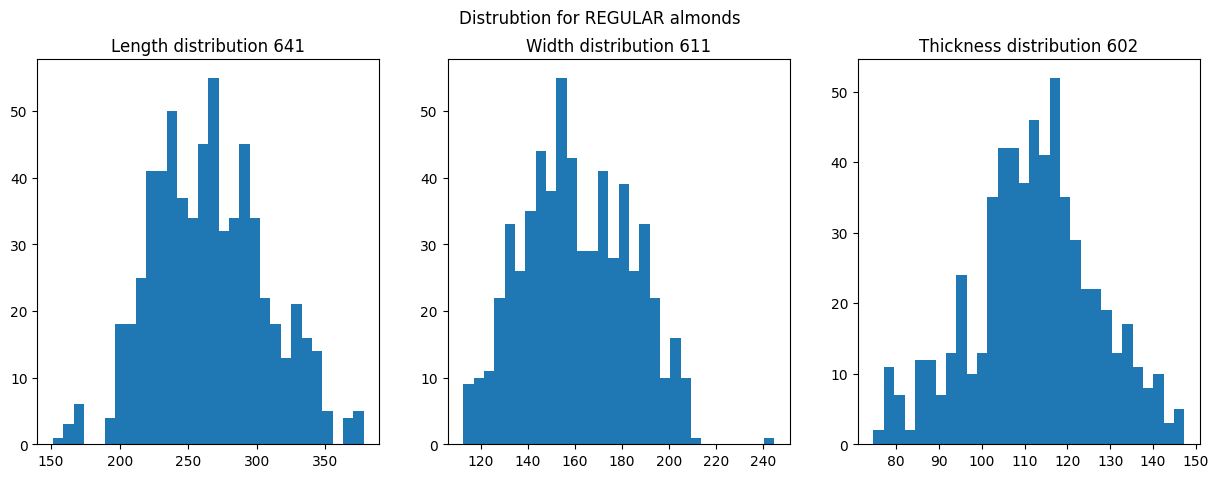

In [4]:
types=df1['Type'].unique()
print(types)
mamra_len_index=np.all([~np.isnan(df1['Length (major axis)']),df1['Type']==types[0]],axis=0)
mamra_width_index=np.all([~np.isnan(df1['Width (minor axis)']),df1['Type']==types[0]],axis=0)
mamra_thick_index=np.all([~np.isnan(df1['Thickness (depth)']),df1['Type']==types[0]],axis=0)

SANORA_len_index=np.all([~np.isnan(df1['Length (major axis)']),df1['Type']==types[1]],axis=0)
SANORA_width_index=np.all([~np.isnan(df1['Width (minor axis)']),df1['Type']==types[1]],axis=0)
SANORA_thick_index=np.all([~np.isnan(df1['Thickness (depth)']),df1['Type']==types[1]],axis=0)

REGULAR_len_index=np.all([~np.isnan(df1['Length (major axis)']),df1['Type']==types[2]],axis=0)
REGULAR_width_index=np.all([~np.isnan(df1['Width (minor axis)']),df1['Type']==types[2]],axis=0)
REGULAR_thick_index=np.all([~np.isnan(df1['Thickness (depth)']),df1['Type']==types[2]],axis=0)

# MAMRA distribution

fig,ax=plt.subplots(1,3,figsize=(15,5))
fig.suptitle('Distrubtion for MAMRA almonds')

mamra_len_dis=df1['Length (major axis)'][mamra_len_index].to_numpy()
ax[0].set_title('Length distribution '+str(len(mamra_len_dis)))
hist=ax[0].hist(df1['Length (major axis)'][mamra_len_index],bins=30)

mamra_width_dis=df1['Width (minor axis)'][mamra_width_index].to_numpy()
ax[1].set_title('Width distribution '+str(len(mamra_width_dis)))
hist=ax[1].hist(df1['Width (minor axis)'][mamra_width_index],bins=30)

mamra_thick_dis=df1['Thickness (depth)'][mamra_thick_index].to_numpy()
ax[2].set_title('Thickness distribution '+str(len(mamra_thick_dis)))
hist=ax[2].hist(df1['Thickness (depth)'][mamra_thick_index],bins=30)

lst_mamra=[mamra_len_dis,mamra_width_dis,mamra_thick_dis]

# SANORA distribution
fig,ax=plt.subplots(1,3,figsize=(15,5))
fig.suptitle('Distrubtion for SANORA almonds')

sanora_len_dis=df1['Length (major axis)'][SANORA_len_index].to_numpy()
ax[0].set_title('Length distribution '+str(len(sanora_len_dis)))
hist=ax[0].hist(df1['Length (major axis)'][SANORA_len_index],bins=30)

sanora_width_dis=df1['Width (minor axis)'][SANORA_width_index].to_numpy()
ax[1].set_title('Width distribution '+str(len(sanora_width_dis)))
hist=ax[1].hist(df1['Width (minor axis)'][SANORA_width_index],bins=30)

sanora_thick_dis=df1['Thickness (depth)'][SANORA_thick_index].to_numpy()
ax[2].set_title('Thickness distribution '+str(len(sanora_thick_dis)))
hist=ax[2].hist(df1['Thickness (depth)'][SANORA_thick_index],bins=30)

lst_sanora=[sanora_len_dis,sanora_width_dis,sanora_thick_dis]
# REGULAR dsitribution

fig,ax=plt.subplots(1,3,figsize=(15,5))
fig.suptitle('Distrubtion for REGULAR almonds')

reg_len_dis=df1['Length (major axis)'][REGULAR_len_index].to_numpy()
ax[0].set_title('Length distribution '+str(len(reg_len_dis)))
hist=ax[0].hist(df1['Length (major axis)'][REGULAR_len_index],bins=30)

reg_width_dis=df1['Width (minor axis)'][REGULAR_width_index].to_numpy()
ax[1].set_title('Width distribution '+str(len(reg_width_dis)))
hist=ax[1].hist(df1['Width (minor axis)'][REGULAR_width_index],bins=30)

reg_thik_dis=df1['Thickness (depth)'][REGULAR_thick_index].to_numpy()
ax[2].set_title('Thickness distribution '+str(len(reg_thik_dis)))
hist=ax[2].hist(df1['Thickness (depth)'][REGULAR_thick_index],bins=30)

lst_reg=[reg_len_dis,reg_width_dis,reg_thik_dis]

In [5]:
from sklearn.mixture import GaussianMixture
import scipy.stats as st
def scorer(estimator,X_train,X_test,Y=None):
    param=estimator.fit(X_train)
    if estimator==st.t:
        model=estimator(df=param[0],loc=param[1],scale=param[2])
    else:
        model=estimator(loc=param[0],scale=param[1])
    logpdf_vals=model.logpdf(X_test)
    return np.mean(logpdf_vals)



In [6]:
def model_scorings(X):
    kf=skmod.KFold(5,shuffle=True)
    lst_score=[]
    dic={'normal':0,'GMM-2':0,'GMM-3':0,'GMM-4':0,'laplace':0}

    for i,(train_index,test_index) in enumerate(kf.split(X)):
        ans_norm=scorer(st.norm,X[train_index],X[test_index],1)
        lst_score.append(ans_norm)
    dic['normal']=np.mean(lst_score)
    
    lst_score=[]
    for i,(train_index,test_index) in enumerate(kf.split(X)):
        ans=scorer(st.laplace,X[train_index],X[test_index],1)
        lst_score.append(ans)
    # print(lst_score)
    dic['laplace']=np.mean(lst_score)
    
    lst_score=[]
    for i in range(2,5):
        ans=skmod.cross_val_score(GaussianMixture(i),X.reshape(-1,1),cv=5)
        lst_score.append(np.mean(ans))

    dic['GMM-2']=lst_score[0]
    dic['GMM-3']=lst_score[1]
    dic['GMM-4']=lst_score[2]

    lst_score=[]
    for i,(train_index,test_index) in enumerate(kf.split(X)):
        ans=scorer(st.t,X[train_index],X[test_index],1)
        lst_score.append(ans)
    dic['student-t']=np.mean(lst_score)
    return dic




In [7]:
np.mean(mamra_len_dis)

321.8072439781705

scoring for MAMORA length
{'normal': -5.797013580036, 'GMM-2': -5.907251017380551, 'GMM-3': -5.913483891077464, 'GMM-4': -5.9392620182655484, 'laplace': -5.9299640171456405, 'student-t': -5.794628064821711}

scoring for MAMORA Width
{'normal': -4.994084910977148, 'GMM-2': -5.061147671936382, 'GMM-3': -5.1059747345912445, 'GMM-4': -5.104196691414788, 'laplace': -5.056713919192852, 'student-t': -4.9943108304455315}

scoring for MAMORA thickness
{'normal': -4.408120257991297, 'GMM-2': -4.554172259980538, 'GMM-3': -4.5015640358866635, 'GMM-4': -4.528162510979196, 'laplace': -4.44321415051034, 'student-t': -4.417772446542609}



Text(0, 0.5, 'density/PDF')

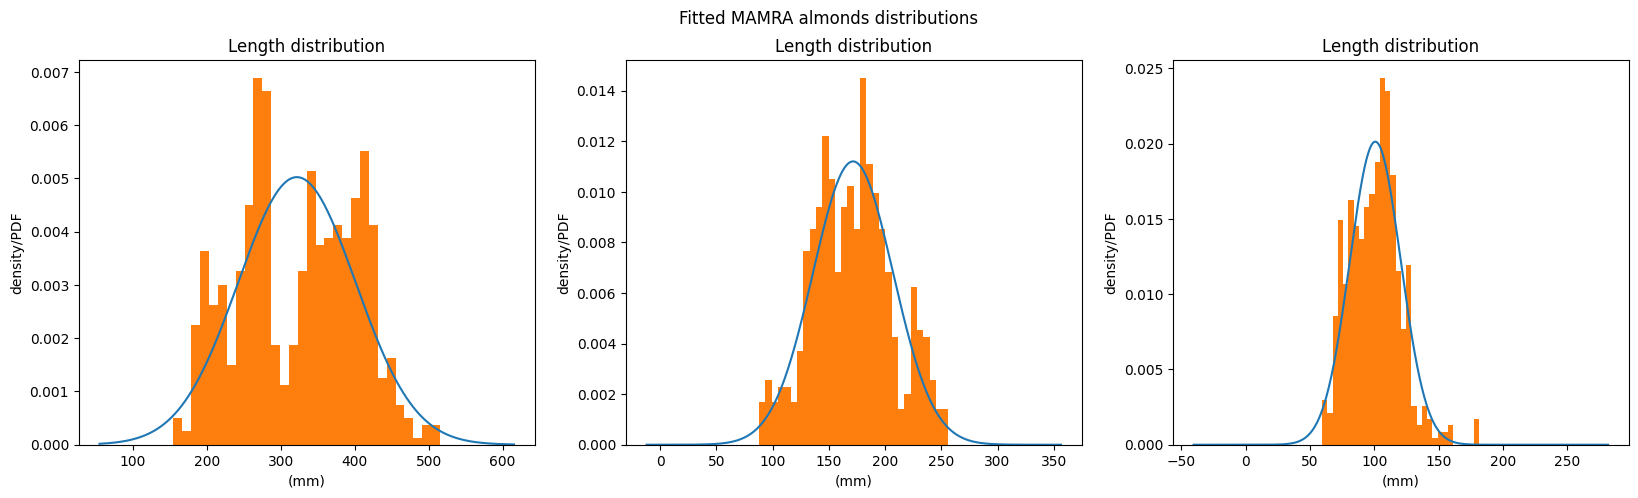

In [8]:
prop=['length','Width','thickness']
for id,i in enumerate(lst_mamra):
    dic=model_scorings(i)
    print('scoring for MAMORA '+ prop[id])
    print(dic)
    print('') 

param=st.norm.fit(mamra_len_dis)
mam_len_model=st.norm(param[0],param[1])
x_len=np.linspace(np.min(mamra_len_dis)-100,np.max(mamra_len_dis)+100,500)
y_len=mam_len_model.pdf(x_len)

param=st.norm.fit(mamra_width_dis)
mam_width_model=st.norm(param[0],param[1])
x_width=np.linspace(np.min(mamra_width_dis)-100,np.max(mamra_width_dis)+100,500)
y_width=mam_width_model.pdf(x_width)

param=st.norm.fit(mamra_thick_dis)
mam_thick_model=st.norm(param[0],param[1])
x_thick=np.linspace(np.min(mamra_thick_dis)-100,np.max(mamra_thick_dis)+100,500)
y_thick=mam_thick_model.pdf(x_thick)

fig,ax=plt.subplots(1,3,figsize=(20,5))
fig.suptitle('Fitted MAMRA almonds distributions')
ax[0].plot(x_len,y_len,label='fitted normal disdtribution')
hist=ax[0].hist(mamra_len_dis,bins=30,density=True)
ax[0].set_title('Length distribution')
ax[0].set_xlabel('(mm)')
ax[0].set_ylabel('density/PDF')

ax[1].plot(x_width,y_width,label='fitted normal disdtribution')
his1=ax[1].hist(mamra_width_dis,bins=30,density=True)
ax[1].set_title('Length distribution')
ax[1].set_xlabel('(mm)')
ax[1].set_ylabel('density/PDF')

ax[2].plot(x_thick,y_thick,label='fitted normal disdtribution')
his2=ax[2].hist(mamra_thick_dis,bins=30,density=True)
ax[2].set_title('Length distribution')
ax[2].set_xlabel('(mm)')
ax[2].set_ylabel('density/PDF')

scoring for SANORA length
{'normal': -5.223324204289927, 'GMM-2': -5.265409120724821, 'GMM-3': -5.282642914230239, 'GMM-4': -5.305090734768307, 'laplace': -5.261361122672814, 'student-t': -5.2263304185169295}

scoring for SANORA Width
{'normal': -4.704273120627932, 'GMM-2': -4.761054223453073, 'GMM-3': -4.779070574871445, 'GMM-4': -4.797218131426327, 'laplace': -4.762036754707976, 'student-t': -4.70456977914297}

scoring for SANORA thickness
{'normal': -4.363665887480773, 'GMM-2': -4.444577305181916, 'GMM-3': -4.4423085192465805, 'GMM-4': -4.455331880753212, 'laplace': -4.408752295498069, 'student-t': -4.363887535454564}



Text(0, 0.5, 'density/PDF')

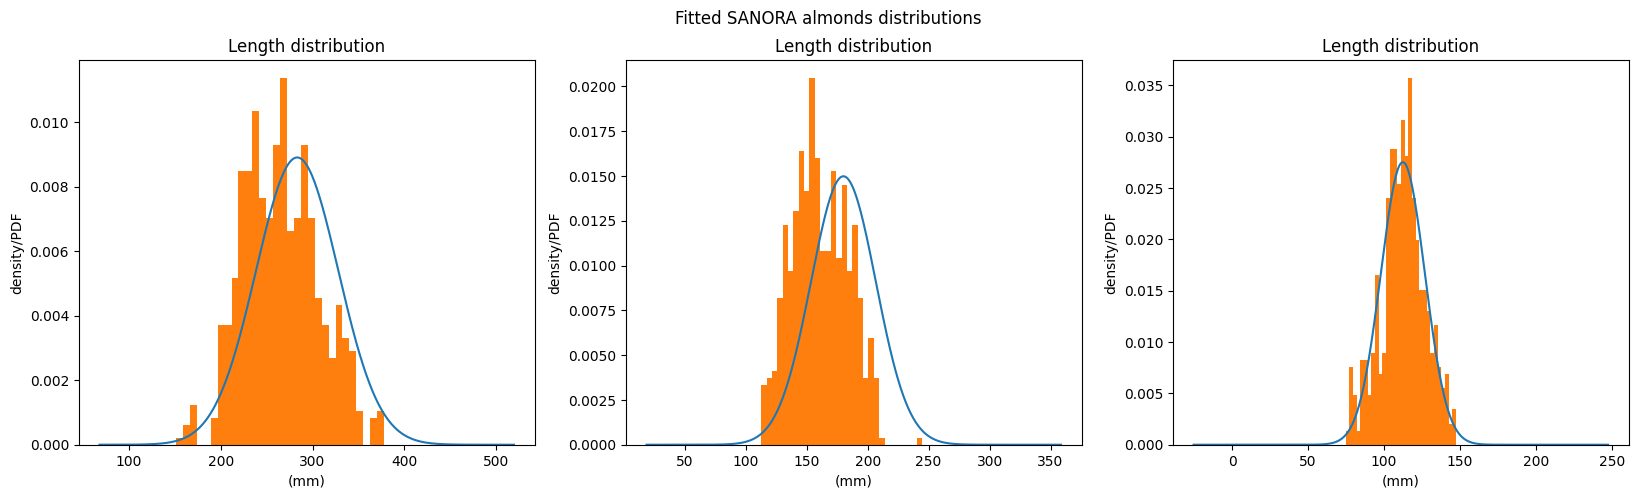

In [9]:
for id,i in enumerate(lst_sanora):
    dic=model_scorings(i)
    print('scoring for SANORA '+ prop[id])
    print(dic)
    print('') 

param=st.norm.fit(sanora_len_dis)
san_len_model=st.norm(param[0],param[1])
x_len=np.linspace(np.min(sanora_len_dis)-100,np.max(sanora_len_dis)+100,500)
y_len=san_len_model.pdf(x_len)

param=st.norm.fit(sanora_width_dis)
san_width_model=st.norm(param[0],param[1])
x_width=np.linspace(np.min(sanora_width_dis)-100,np.max(sanora_width_dis)+100,500)
y_width=san_width_model.pdf(x_width)

param=st.norm.fit(reg_thik_dis)
san_thick_model=st.norm(param[0],param[1])
x_thick=np.linspace(np.min(reg_thik_dis)-100,np.max(reg_thik_dis)+100,500)
y_thick=san_thick_model.pdf(x_thick)

fig,ax=plt.subplots(1,3,figsize=(20,5))
fig.suptitle('Fitted SANORA almonds distributions')
ax[0].plot(x_len,y_len,label='fitted normal disdtribution')
hist=ax[0].hist(reg_len_dis,bins=30,density=True)
ax[0].set_title('Length distribution')
ax[0].set_xlabel('(mm)')
ax[0].set_ylabel('density/PDF')

ax[1].plot(x_width,y_width,label='fitted normal disdtribution')
his1=ax[1].hist(reg_width_dis,bins=30,density=True)
ax[1].set_title('Length distribution')
ax[1].set_xlabel('(mm)')
ax[1].set_ylabel('density/PDF')

ax[2].plot(x_thick,y_thick,label='fitted normal disdtribution')
his2=ax[2].hist(reg_thik_dis,bins=30,density=True)
ax[2].set_title('Length distribution')
ax[2].set_xlabel('(mm)')
ax[2].set_ylabel('density/PDF')

scoring for regular length
{'normal': -5.140767006054216, 'GMM-2': -5.27474600832761, 'GMM-3': -5.310563776596409, 'GMM-4': -5.3480974856940175, 'laplace': -5.202827235305571, 'student-t': -5.139564635399312}

scoring for regular Width
{'normal': -4.5473502647353925, 'GMM-2': -4.584022879907861, 'GMM-3': -4.593436459334955, 'GMM-4': -4.602348990129984, 'laplace': -4.634720961403474, 'student-t': -4.546887651359238}

scoring for regular thickness
{'normal': -4.0955722292325545, 'GMM-2': -4.169691720274922, 'GMM-3': -4.151479978380076, 'GMM-4': -4.156619648310043, 'laplace': -4.123928348242627, 'student-t': -4.097016796749633}



Text(0, 0.5, 'density/PDF')

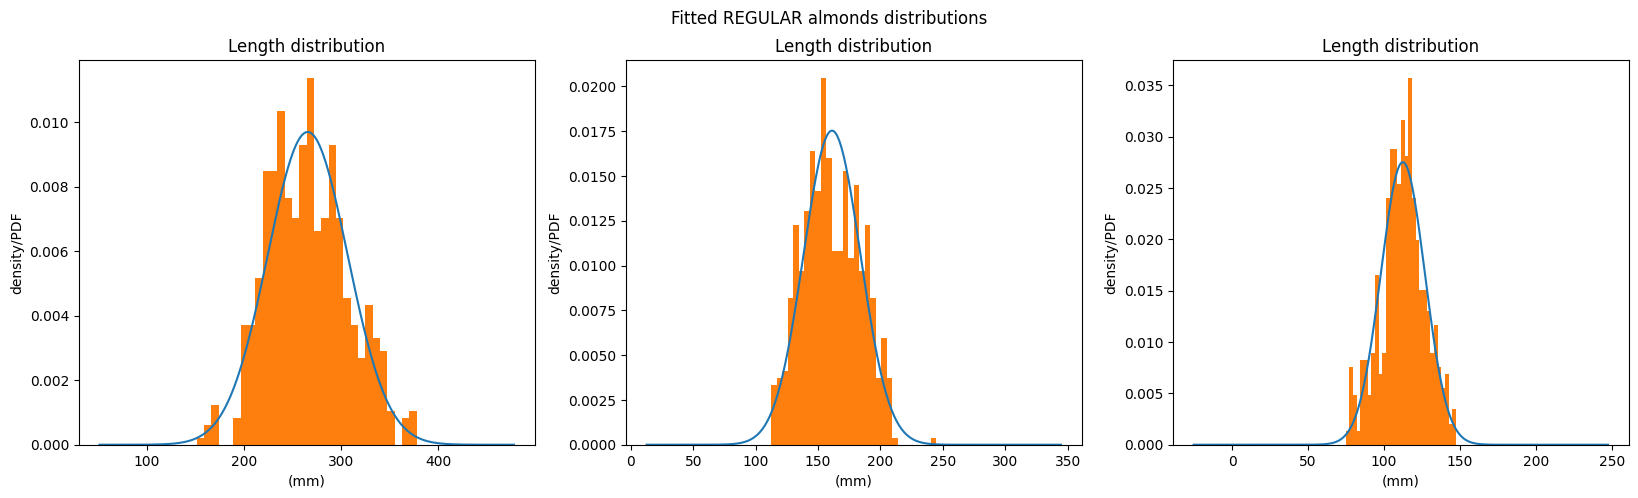

In [10]:
for id,i in enumerate(lst_reg):
    dic=model_scorings(i)
    print('scoring for regular '+ prop[id])
    print(dic)
    print('') 

param=st.norm.fit(reg_len_dis)
reg_len_model=st.norm(param[0],param[1])
x_len=np.linspace(np.min(reg_len_dis)-100,np.max(reg_len_dis)+100,500)
y_len=reg_len_model.pdf(x_len)

param=st.norm.fit(reg_width_dis)
reg_width_model=st.norm(param[0],param[1])
x_width=np.linspace(np.min(reg_width_dis)-100,np.max(reg_width_dis)+100,500)
y_width=reg_width_model.pdf(x_width)

param=st.norm.fit(reg_thik_dis)
reg_thick_model=st.norm(param[0],param[1])
x_thick=np.linspace(np.min(reg_thik_dis)-100,np.max(reg_thik_dis)+100,500)
y_thick=reg_thick_model.pdf(x_thick)

fig,ax=plt.subplots(1,3,figsize=(20,5))
fig.suptitle('Fitted REGULAR almonds distributions')
ax[0].plot(x_len,y_len,label='fitted normal disdtribution')
hist=ax[0].hist(reg_len_dis,bins=30,density=True)
ax[0].set_title('Length distribution')
ax[0].set_xlabel('(mm)')
ax[0].set_ylabel('density/PDF')

ax[1].plot(x_width,y_width,label='fitted normal disdtribution')
his1=ax[1].hist(reg_width_dis,bins=30,density=True)
ax[1].set_title('Length distribution')
ax[1].set_xlabel('(mm)')
ax[1].set_ylabel('density/PDF')

ax[2].plot(x_thick,y_thick,label='fitted normal disdtribution')
his2=ax[2].hist(reg_thik_dis,bins=30,density=True)
ax[2].set_title('Length distribution')
ax[2].set_xlabel('(mm)')
ax[2].set_ylabel('density/PDF')

In [11]:
df1=pd.read_csv('Almond.csv',index_col=0)

In [12]:
from tqdm import tqdm

blank_mamra_bool=np.all([df1['Length (major axis)'].isnull(),df1['Type']=='MAMRA'],axis=0)
x=np.arange(10,20)
blank_mamra_index=np.where(blank_mamra_bool==True)[0]
for id,i in enumerate(blank_mamra_index):
    s=0
    while (s<df1['Width (minor axis)'][i]) or (s<df1['Thickness (depth)'][i]):
        s=mam_len_model.rvs(1)
    # print(i)
    df1.loc[i,'Length (major axis)']=s
df1.loc[blank_mamra_index,'Roundness']=4 * df1['Area'][blank_mamra_index] / (np.pi*df1['Length (major axis)'][blank_mamra_index]**2)
df1.loc[blank_mamra_index,'Aspect Ratio']=df1['Length (major axis)'][blank_mamra_index]/df1['Width (minor axis)'][blank_mamra_index]
df1.loc[blank_mamra_index,'Eccentricity']=np.sqrt(1-(df1['Width (minor axis)'][blank_mamra_index]/df1['Length (major axis)'][blank_mamra_index])**2)

blank_mamra_bool=np.all([df1['Width (minor axis)'].isnull(),df1['Type']=='MAMRA'],axis=0)
x=np.arange(10,20)
blank_mamra_index=np.where(blank_mamra_bool==True)[0]
for id,i in enumerate(blank_mamra_index):
    s=0
    while (s>df1['Length (major axis)'][i]) or (s<df1['Thickness (depth)'][i]):
        s=mam_len_model.rvs(1)
    df1.loc[i,'Width (minor axis)']=s
df1.loc[blank_mamra_index,'Aspect Ratio']=df1['Length (major axis)'][blank_mamra_index]/df1['Width (minor axis)'][blank_mamra_index]
df1.loc[blank_mamra_index,'Eccentricity']=np.sqrt(1-(df1['Width (minor axis)'][blank_mamra_index]/df1['Length (major axis)'][blank_mamra_index])**2)

blank_mamra_bool=np.all([df1['Thickness (depth)'].isnull(),df1['Type']=='MAMRA'],axis=0)
x=np.arange(10,20)
blank_mamra_index=np.where(blank_mamra_bool==True)[0]
df1.loc[blank_mamra_index,'Thickness (depth)'] = mam_thick_model.rvs(len(blank_mamra_index))

In [13]:
blank_sanora_bool=np.all([df1['Length (major axis)'].isnull(),df1['Type']=='SANORA'],axis=0)
x=np.arange(10,20)
blank_sanora_index=np.where(blank_sanora_bool==True)[0]

for id,i in enumerate(blank_sanora_index):
    s=0
    while (s<df1['Width (minor axis)'][i]) or (s<df1['Thickness (depth)'][i]):
        s=san_len_model.rvs(1)
    df1.loc[i,'Length (major axis)']=s
df1.loc[blank_sanora_index,'Roundness']=4 * df1['Area'][blank_sanora_index] / (np.pi*df1['Length (major axis)'][blank_sanora_index]**2)
df1.loc[blank_sanora_index,'Aspect Ratio']=df1['Length (major axis)'][blank_sanora_index]/df1['Width (minor axis)'][blank_sanora_index]
df1.loc[blank_sanora_index,'Eccentricity']=np.sqrt(1-(df1['Width (minor axis)'][blank_sanora_index]/df1['Length (major axis)'][blank_sanora_index])**2)

blank_sanora_bool=np.all([df1['Width (minor axis)'].isnull(),df1['Type']=='SANORA'],axis=0)
x=np.arange(10,20)
blank_sanora_index=np.where(blank_sanora_bool==True)[0]
for id,i in enumerate(blank_sanora_index):
    s=0
    while (s>df1['Length (major axis)'][i]) or (s<df1['Thickness (depth)'][i]):
        s=san_width_model.rvs(1)
    df1.loc[i,'Width (minor axis)']=s
df1.loc[blank_sanora_index,'Aspect Ratio']=df1['Length (major axis)'][blank_sanora_index]/df1['Width (minor axis)'][blank_sanora_index]
df1.loc[blank_sanora_index,'Eccentricity']=np.sqrt(1-(df1['Width (minor axis)'][blank_sanora_index]/df1['Length (major axis)'][blank_sanora_index])**2)

blank_sanora_bool=np.all([df1['Thickness (depth)'].isnull(),df1['Type']=='SANORA'],axis=0)
x=np.arange(10,20)
blank_sanora_index=np.where(blank_sanora_bool==True)[0]
df1.loc[blank_sanora_index,'Thickness (depth)'] = san_thick_model.rvs(len(blank_sanora_index))

In [14]:
blank_reg_bool=np.all([df1['Length (major axis)'].isnull(),df1['Type']=='REGULAR'],axis=0)
x=np.arange(10,20)
blank_reg_index=np.where(blank_reg_bool==True)[0]
for id,i in enumerate(blank_reg_index):
    s=0
    while (s<df1['Width (minor axis)'][i]) or (s<df1['Thickness (depth)'][i]):
        s=reg_len_model.rvs(1)
    df1.loc[i,'Length (major axis)']=s
df1.loc[blank_reg_index,'Roundness']=4 * df1['Area'][blank_reg_index] / (np.pi*df1['Length (major axis)'][blank_reg_index]**2)
df1.loc[blank_reg_index,'Aspect Ratio']=df1['Length (major axis)'][blank_reg_index]/df1['Width (minor axis)'][blank_reg_index]
df1.loc[blank_reg_index,'Eccentricity']=np.sqrt(1-(df1['Width (minor axis)'][blank_reg_index]/df1['Length (major axis)'][blank_reg_index])**2)

blank_reg_bool=np.all([df1['Width (minor axis)'].isnull(),df1['Type']=='REGULAR'],axis=0)
x=np.arange(10,20)
blank_reg_index=np.where(blank_reg_bool==True)[0]
for id,i in enumerate(blank_reg_index):
    s=0
    while (s>df1['Length (major axis)'][i]) or (s<df1['Thickness (depth)'][i]):
        s=reg_width_model.rvs(1)
    df1.loc[i,'Width (minor axis)']=s
df1.loc[blank_reg_index,'Aspect Ratio']=df1['Length (major axis)'][blank_reg_index]/df1['Width (minor axis)'][blank_reg_index]
df1.loc[blank_reg_index,'Eccentricity']=np.sqrt(1-(df1['Width (minor axis)'][blank_reg_index]/df1['Length (major axis)'][blank_reg_index])**2)

blank_reg_bool=np.all([df1['Thickness (depth)'].isnull(),df1['Type']=='REGULAR'],axis=0)
x=np.arange(10,20)
blank_reg_index=np.where(blank_reg_bool==True)[0]
df1.loc[blank_reg_index,'Thickness (depth)'] = reg_thick_model.rvs(len(blank_reg_index))

In [15]:
df1

,Length (major axis),Width (minor axis),Thickness (depth),Area,Perimeter,Roundness,Solidity,Compactness,Aspect Ratio,Eccentricity,Extent,Convex hull(convex area),Type
0,398.352153,227.940628,127.759132,22619.0,643.813269,0.181489,0.973384,1.458265,1.747614,0.820108,0.681193,23237.5,MAMRA
1,379.878869,234.188126,128.199509,23038.0,680.984841,0.203266,0.957304,1.601844,1.622110,0.787370,0.656353,24065.5,MAMRA
2,383.828468,229.418610,125.796547,22386.5,646.943212,0.193474,0.967270,1.487772,1.673049,0.801711,0.683620,23144.0,MAMRA
3,337.176378,232.763153,125.918808,22578.5,661.227483,0.252866,0.965512,1.540979,1.448581,0.723494,0.685360,23385.0,MAMRA
4,396.661862,230.150742,107.253448,19068.0,624.842706,0.154303,0.951450,1.629395,1.723487,0.814461,0.714800,20041.0,MAMRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2798,278.868808,192.709366,122.356506,18471.5,653.345233,0.302421,0.931000,1.838965,1.447095,0.722817,0.725739,19840.5,SANORA
2799,400.220799,186.254745,118.708961,17213.5,581.688379,0.136830,0.952706,1.564234,2.148782,0.885111,0.714016,18068.0,SANORA
2800,296.133806,186.196182,119.147224,17510.5,608.315795,0.254233,0.948821,1.681705,1.590440,0.777602,0.718999,18455.0,SANORA
2801,239.228402,188.660828,120.634438,17941.0,630.759446,0.399146,0.944810,1.764701,1.268034,0.614878,0.738191,18989.0,SANORA


Text(0, 0.5, 'density/PDF')

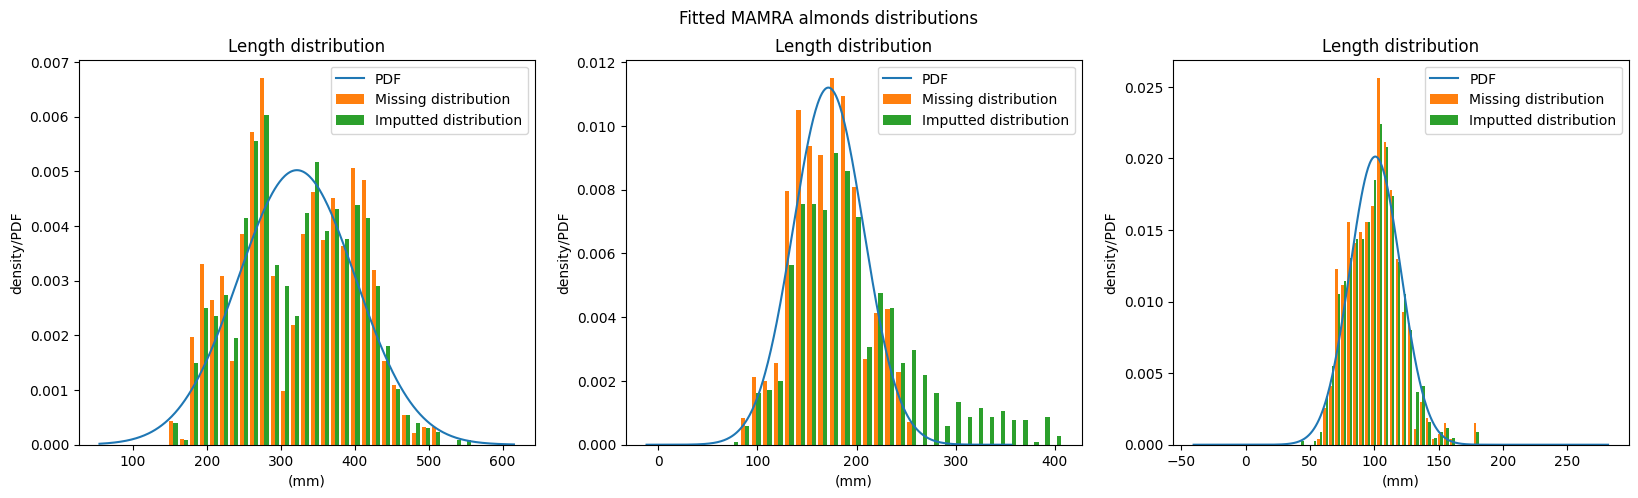

In [16]:
x_len=np.linspace(np.min(mamra_len_dis)-100,np.max(mamra_len_dis)+100,500)
y_len=mam_len_model.pdf(x_len)

x_width=np.linspace(np.min(mamra_width_dis)-100,np.max(mamra_width_dis)+100,500)
y_width=mam_width_model.pdf(x_width)

x_thick=np.linspace(np.min(mamra_thick_dis)-100,np.max(mamra_thick_dis)+100,500)
y_thick=mam_thick_model.pdf(x_thick)

fig,ax=plt.subplots(1,3,figsize=(20,5))
fig.suptitle('Fitted MAMRA almonds distributions')
ax[0].plot(x_len,y_len,label='fitted normal disdtribution')
hist=ax[0].hist([mamra_len_dis,df1['Length (major axis)'][df1['Type']==types[0]]],bins=30,density=True)
# hist=ax[0].hist(df1['Length (major axis)'][df1['Type']==types[0]],alpha=0.2)
ax[0].legend(['PDF','Missing distribution','Imputted distribution'])
ax[0].set_title('Length distribution')
ax[0].set_xlabel('(mm)')
ax[0].set_ylabel('density/PDF')

ax[1].plot(x_width,y_width,label='fitted normal disdtribution')
his1=ax[1].hist([mamra_width_dis,df1['Width (minor axis)'][df1['Type']==types[0]]],bins=30,density=True)
ax[1].legend(['PDF','Missing distribution','Imputted distribution'])
ax[1].set_title('Length distribution')
ax[1].set_xlabel('(mm)')
ax[1].set_ylabel('density/PDF')

ax[2].plot(x_thick,y_thick,label='fitted normal disdtribution')
his2=ax[2].hist([mamra_thick_dis,df1['Thickness (depth)'][df1['Type']==types[0]]],bins=30,density=True)
ax[2].legend(['PDF','Missing distribution','Imputted distribution'])
ax[2].set_title('Length distribution')
ax[2].set_xlabel('(mm)')
ax[2].set_ylabel('density/PDF')

Text(0, 0.5, 'Density/PDF')

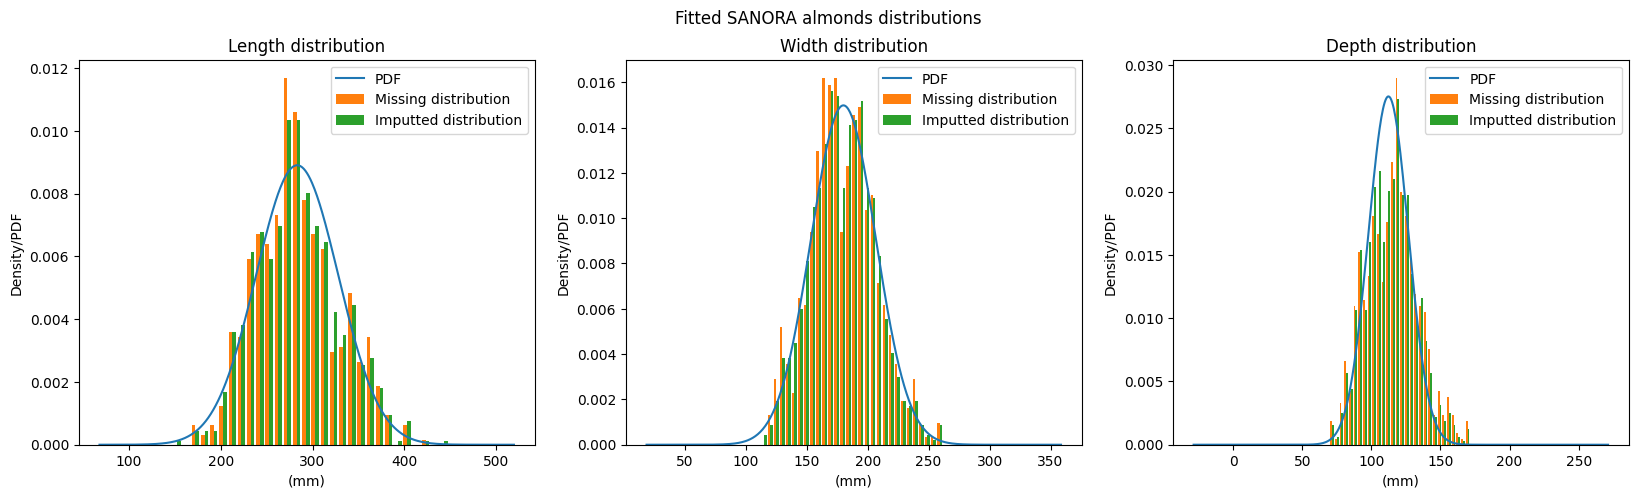

In [17]:
x_len=np.linspace(np.min(sanora_len_dis)-100,np.max(sanora_len_dis)+100,500)
y_len=san_len_model.pdf(x_len)

x_width=np.linspace(np.min(sanora_width_dis)-100,np.max(sanora_width_dis)+100,500)
y_width=san_width_model.pdf(x_width)

x_thick=np.linspace(np.min(sanora_thick_dis)-100,np.max(sanora_thick_dis)+100,500)
y_thick=san_thick_model.pdf(x_thick)

fig,ax=plt.subplots(1,3,figsize=(20,5))
fig.suptitle('Fitted SANORA almonds distributions')
ax[0].plot(x_len,y_len,label='fitted normal distribution')
hist=ax[0].hist([sanora_len_dis,df1['Length (major axis)'][df1['Type']==types[1]]],bins=30,density=True)
ax[0].legend(['PDF','Missing distribution','Imputted distribution'])
ax[0].set_title('Length distribution')
ax[0].set_xlabel('(mm)')
ax[0].set_ylabel('Density/PDF')

ax[1].plot(x_width,y_width,label='fitted normal distribution')
his1=ax[1].hist([sanora_width_dis,df1['Width (minor axis)'][df1['Type']==types[1]]],bins=30,density=True)
ax[1].legend(['PDF','Missing distribution','Imputted distribution'])
ax[1].set_title('Width distribution')
ax[1].set_xlabel('(mm)')
ax[1].set_ylabel('Density/PDF')

ax[2].plot(x_thick,y_thick,label='fitted normal distribution')
his2=ax[2].hist([sanora_thick_dis,df1['Thickness (depth)'][df1['Type']==types[1]]],bins=30,density=True)
ax[2].legend(['PDF','Missing distribution','Imputted distribution'])
ax[2].set_title('Depth distribution')
ax[2].set_xlabel('(mm)')
ax[2].set_ylabel('Density/PDF')

Text(0, 0.5, 'Density/PDF')

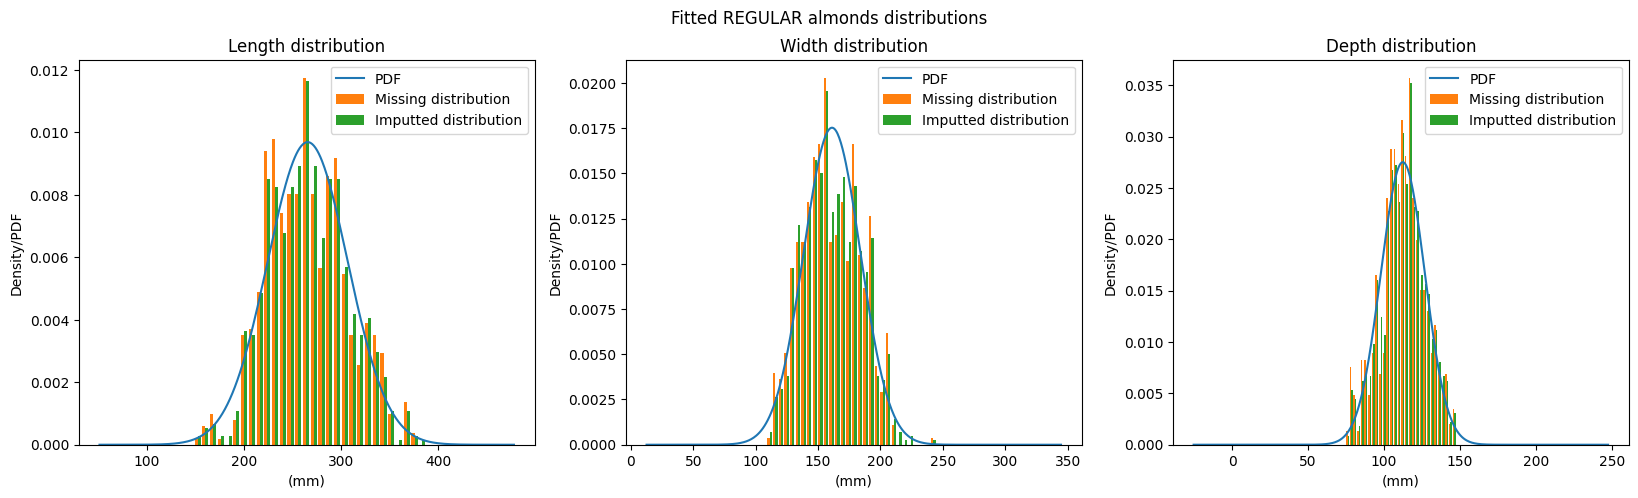

In [18]:
x_len=np.linspace(np.min(reg_len_dis)-100,np.max(reg_len_dis)+100,500)
y_len=reg_len_model.pdf(x_len)
fig,ax=plt.subplots(1,3,figsize=(20,5))
fig.suptitle('Fitted REGULAR almonds distributions')
ax[0].plot(x_len,y_len,label='fitted normal distribution')
hist=ax[0].hist([reg_len_dis,df1['Length (major axis)'][df1['Type']==types[2]]],bins=30,density=True)
ax[0].legend(['PDF','Missing distribution','Imputted distribution'])
ax[0].set_title('Length distribution')
ax[0].set_xlabel('(mm)')
ax[0].set_ylabel('Density/PDF')

x_width=np.linspace(np.min(reg_width_dis)-100,np.max(reg_width_dis)+100,500)
y_width=reg_width_model.pdf(x_width)
ax[1].plot(x_width,y_width,label='fitted normal distribution')
his1=ax[1].hist([reg_width_dis,df1['Width (minor axis)'][df1['Type']==types[2]]],bins=30,density=True)
ax[1].legend(['PDF','Missing distribution','Imputted distribution'])
ax[1].set_title('Width distribution')
ax[1].set_xlabel('(mm)')
ax[1].set_ylabel('Density/PDF')

x_thick=np.linspace(np.min(reg_thik_dis)-100,np.max(reg_thik_dis)+100,500)
y_thick=reg_thick_model.pdf(x_thick)
ax[2].plot(x_thick,y_thick,label='fitted normal distribution')
his2=ax[2].hist([reg_thik_dis,df1['Thickness (depth)'][df1['Type']==types[2]]],bins=30,density=True)
ax[2].legend(['PDF','Missing distribution','Imputted distribution'])
ax[2].set_title('Depth distribution')
ax[2].set_xlabel('(mm)')
ax[2].set_ylabel('Density/PDF')

In [19]:
features_mat=df1.loc[:,'Length (major axis)':'Convex hull(convex area)'].to_numpy()
print(features_mat.shape)
labels=df1.iloc[:,-1].to_list()
labels=np.array(labels).reshape(-1,1)
standard_scaler=pre.StandardScaler()
normalise_scaler=pre.MinMaxScaler()

# features_mat_stan=standard_scaler.fit_transform(features_mat)

(2803, 12)


In [20]:
# df1.to_excel('feat.xlsx')

In [28]:
pipe_cls=pipe.make_pipeline(pre.StandardScaler(),sk_nn.MLPClassifier(hidden_layer_sizes=(100,30),max_iter=10000,n_iter_no_change=2000,activation='relu',early_stopping=True,validation_fraction=0.3))
enc=pre.OneHotEncoder(sparse_output=False)
enc.fit(labels)
enc_labels=enc.transform(labels)
xtrain_val,xtest,ytrain,ytest=skmod.train_test_split(features_mat,labels.ravel(),test_size=0.3)
pipe_cls.fit(xtrain_val,ytrain)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpclassifier',
                 MLPClassifier(early_stopping=True,
                               hidden_layer_sizes=(100, 30), max_iter=10000,
                               n_iter_no_change=2000,
                               validation_fraction=0.3))])

In [30]:
pipe_cls.steps[1][1].best_validation_score_

0.7572156196943973

Best validation score= 0.7572156196943973


Text(0.5, 1.0, 'cross entropy loss curve')

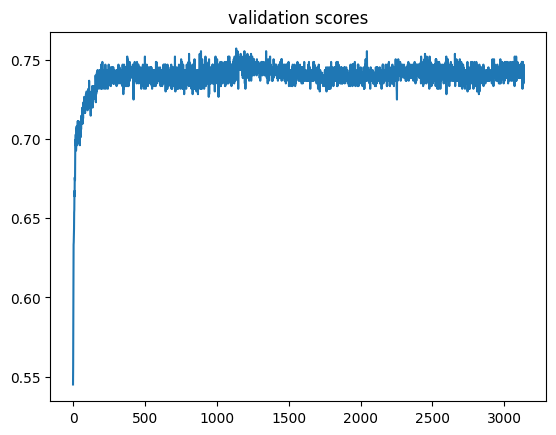

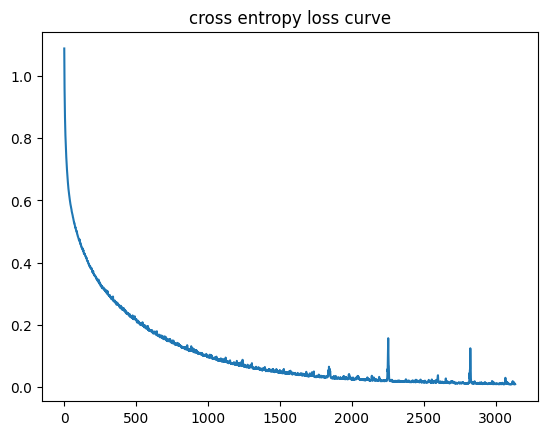

In [29]:
plt.figure()
plt.plot(pipe_cls.steps[1][1].validation_scores_)
plt.title('validation scores')
print('Best validation score=',pipe_cls.steps[1][1].best_validation_score_)

plt.figure()
plt.plot(pipe_cls.steps[1][1].loss_curve_)
plt.title('cross entropy loss curve')

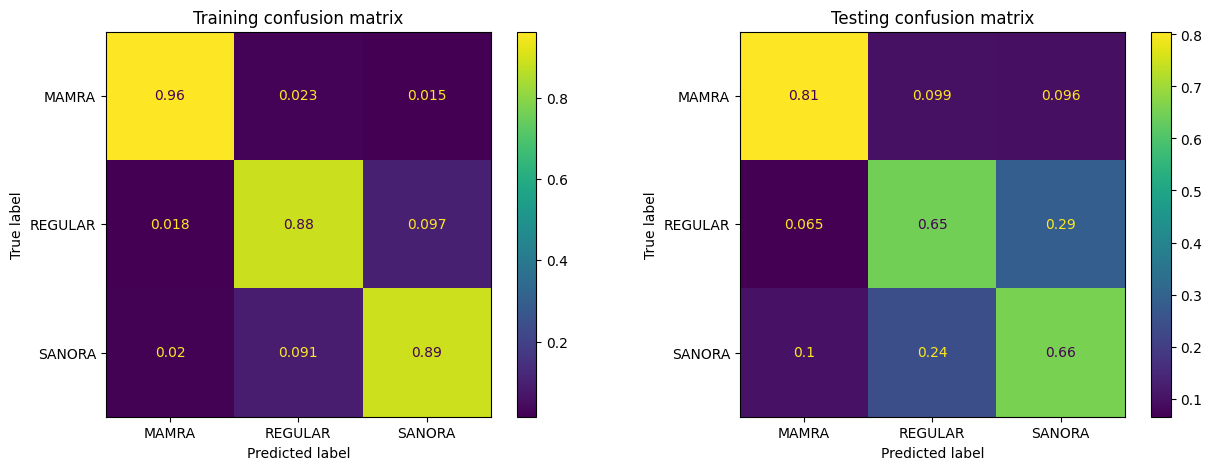

0.9123343527013251

In [35]:
ypred=pipe_cls.predict(xtrain_val)
ypred
fig,ax=plt.subplots(1,2,figsize=(15,5))
skmet.ConfusionMatrixDisplay.from_estimator(pipe_cls,xtrain_val,ytrain,ax=ax[0],normalize='true')
ax[0].set_title('Training confusion matrix')
skmet.ConfusionMatrixDisplay.from_estimator(pipe_cls,xtest,ytest,ax=ax[1],normalize='true')
ax[1].set_title('Testing confusion matrix')
plt.show()
skmet.accuracy_score(ytrain,ypred)

In [120]:
# for i in features_mat.T:
#     plt.figure()
#     hist=plt.hist(i,bins=30,density=True)

In [121]:
# # scale=pre.minmax_scale()
# scale.fit(features_mat[:,-5].reshape(-1,1))
# hist=plt.hist(pre.minmax_scale(features_mat[:,-5].reshape(-1,1)),bins=30,density=True)

In [122]:
# for i in pre.StandardScaler().fit_transform(features_mat).T:
#     plt.figure()
#     hist=plt.hist(i,bins=30,density=True)

In [123]:
# pre.LabelEncoder?
# le=pre.LabelEncoder()
# le.fit(labels)
# le.classes_
# # labels
# le.transform?